In [1]:
import numpy as np 
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('/content/IDZ Digital data analyst.xlsx')
df.head()

,First Name,Last Name,Gender,Age,Occupation,Salary,Marital Status,No. of Children
0,Jacob,Robinson,Male,58,Lawer,6779,Married,2
1,Grace,Taylor,Female,36,Insurer,4466,Married,1
2,Charlie,Wilson,Male,58,Aeroplane Pilot,5786,Single,0
3,Vanessa,Farrell,Female,23,Lawer,3403,Married,2
4,Fenton,Harrison,Male,21,Architect,693,Married,0


##visualizing the data provided to find 20 interesting observations from this data. 

In [4]:
df.columns = df.columns.str.replace(' ', '')

In [5]:
# Configuring styles
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


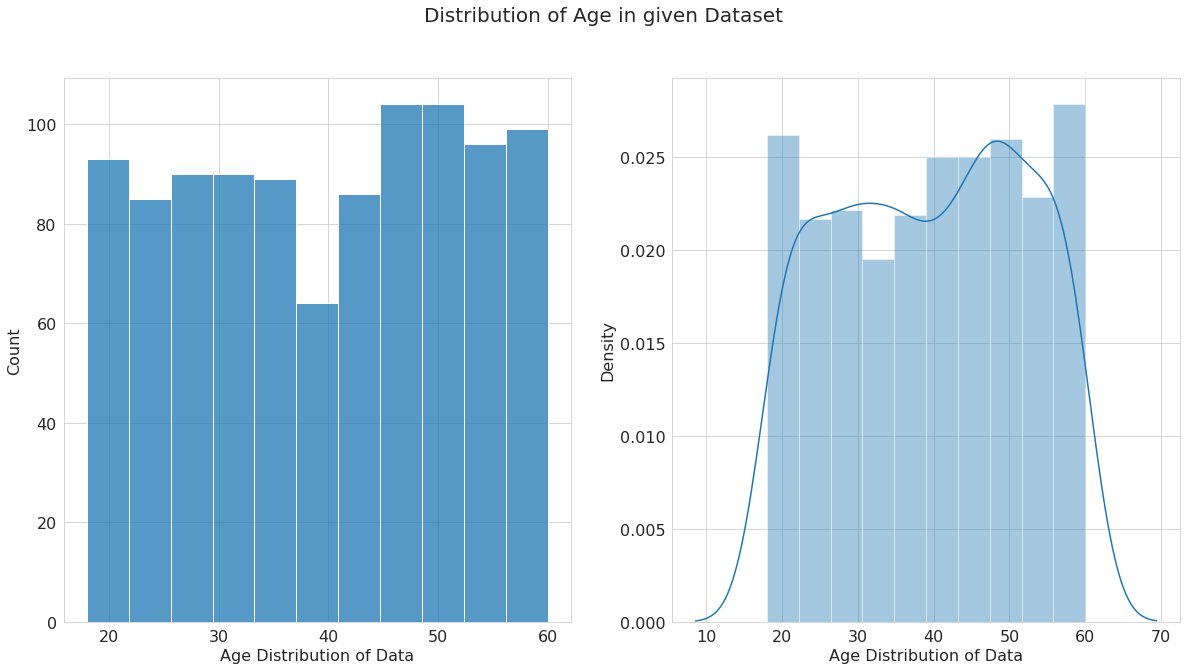

In [8]:
#Total age counts in given data
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.xlabel('Age Distribution of Data')
plt.suptitle("Distribution of Age in given Dataset", size=20)
sns.set_style("whitegrid")
sns.histplot(df.Age)
plt.subplot(1,2,2)
sns.set_style("whitegrid")
sns.distplot(df.Age,axlabel='Age Distribution of Data');

* ***From the above two charts , it is clear that there all the ages are more or less equally distruibuted across the data set. However one can see the spike when the age increase from 50 onwards***

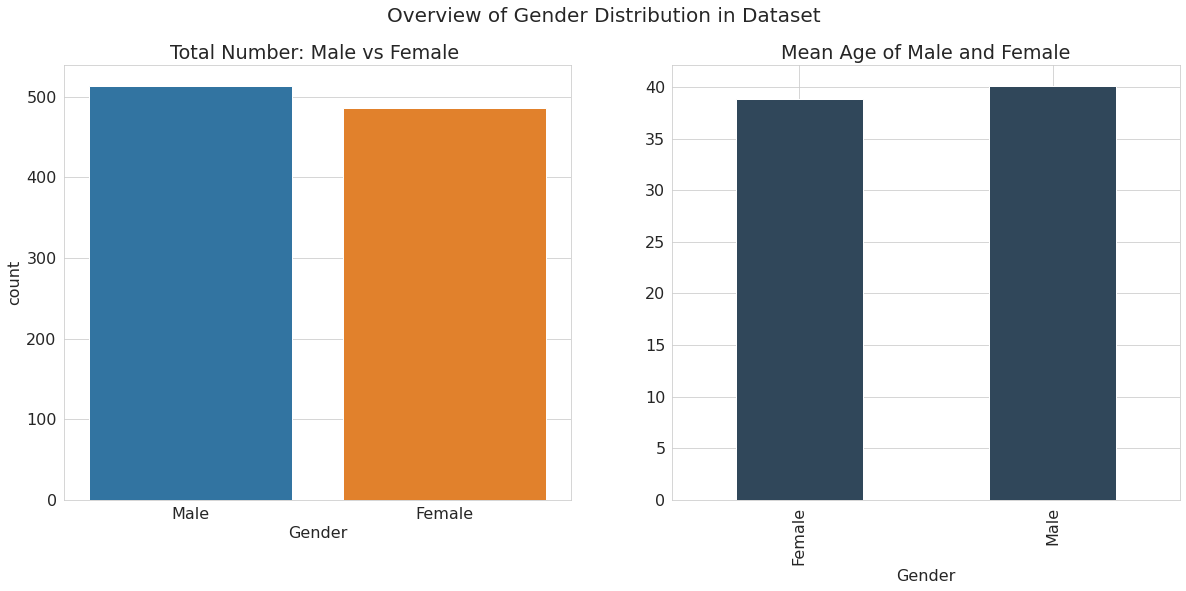

In [10]:
#Total numvber of male and female counts 
plt.figure(figsize=(20, 8))
plt.suptitle("Overview of Gender Distribution in Dataset", size=20)
plt.subplot(1,2,1)
sns.countplot(x='Gender',data=df);
plt.title('Total Number: Male vs Female ')
plt.subplot(1,2,2)
df.groupby('Gender').Age.mean().plot(kind='bar',color='#30475A')
plt.title('Mean Age of Male and Female');


* ***From the above two charts , it is clear that , Total number of male indivisuals are more than female indivisuals and mean age of female i.e. (35.8) is less than male viz(40).***

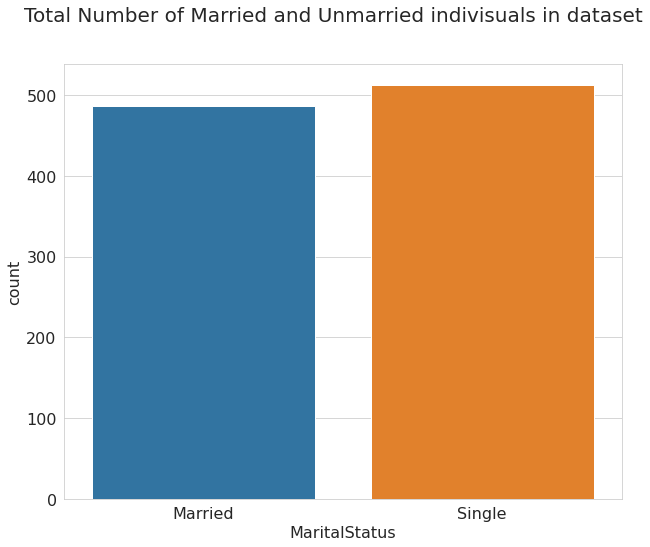

In [11]:
# Checking total number of married and unmarried person
plt.figure(figsize=(10, 8))
plt.suptitle("Total Number of Married and Unmarried indivisuals in dataset", size=20)
sns.countplot(x=df.MaritalStatus);

* ***From the above charts , it is clear that , Total number Single indivisuals are more in the data as compared to married indivisual.***

In [14]:
pd.crosstab([df.Gender,df.MaritalStatus],df.Occupation,margins=True).style.background_gradient(cmap='YlOrBr')

* ***Above Crosstab is subtle representation of Male and Female which are further divided into Married and Single indivisual around respective occupation.***

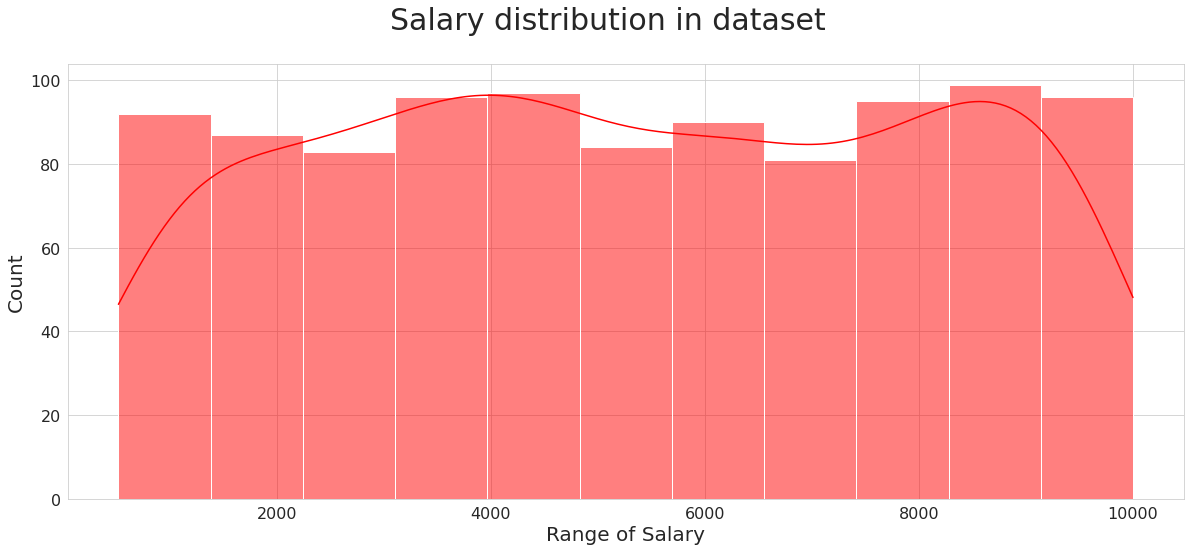

In [17]:
#Salary Distribution
#sns.kdeplot(df['Salary'],gridsize=500)
plt.figure(figsize=(20, 8))
plt.suptitle("Salary distribution in dataset", size=30)
plt.xlabel('Range of Salary',size=20)
plt.ylabel('Count',size=20)
sns.histplot(df['Salary'],kde=True,color='red');

In [18]:
print('The max Salary:',df.Salary.describe().loc['max'])
print('The min Salary:',df.Salary.describe().loc['min'])

The max Salary: 10000.0
The min Salary: 520.0


* ***Above histrogram shows that salary of each slab is more or less equally distributed among indivisual it means that there no huge diffrence in salary , more or less every one belongs to same economical class.***

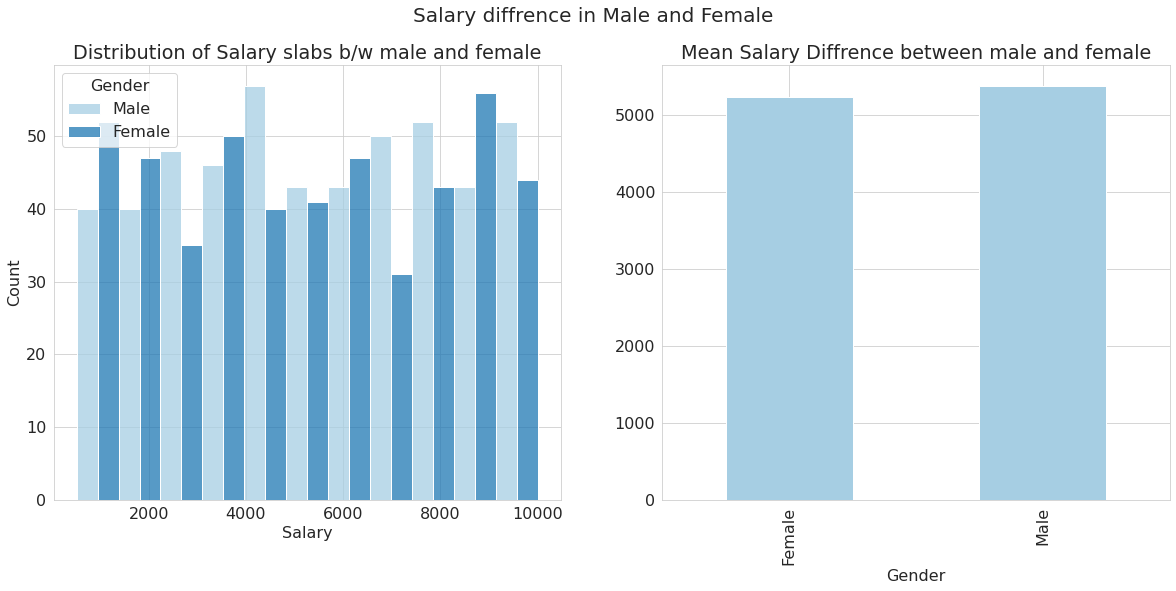

In [19]:
sns.set_palette("Paired")
plt.figure(figsize=(20, 8))
plt.suptitle("Salary diffrence in Male and Female", size=20)
plt.subplot(1,2,1)
sns.histplot(x='Salary',hue='Gender',data=df,multiple='dodge')
plt.title('Distribution of Salary slabs b/w male and female')
plt.subplot(1,2,2)
df.groupby('Gender')['Salary'].mean().plot(kind='bar')
plt.title('Mean Salary Diffrence between male and female');

* ***From the above two charts , it is clear that , there exist gap in male & female Salary . This is called wagegap in economics. Males are earning more than female***

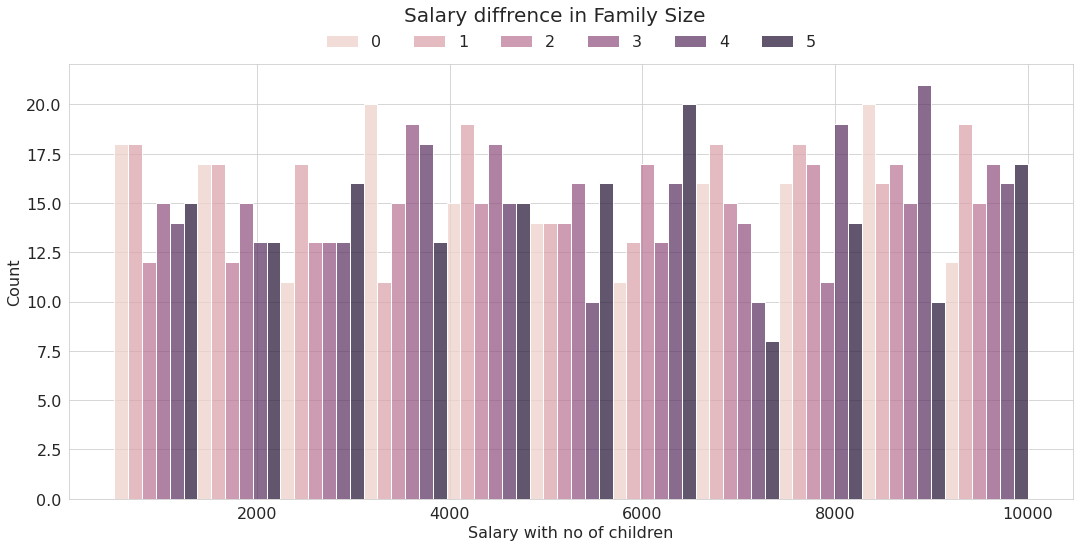

In [20]:
sns.set_palette("Paired")
plt.figure(figsize=(18, 8))
plt.suptitle("Salary diffrence in Family Size", size=20)
plt.xlabel('Salary with no of children')
ax = sns.histplot(x='Salary',hue='No.ofChildren',data=df,multiple='dodge',legend=True)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=6, title=None, frameon=False)
plt.show()

* ***From the above charts , we can infer that when salary of indivisual is less , he/she prefers zero children , however no of children increase for indivisual earning comparitively high this is because he/she could afford 'X' no of children without affecting standard of living***

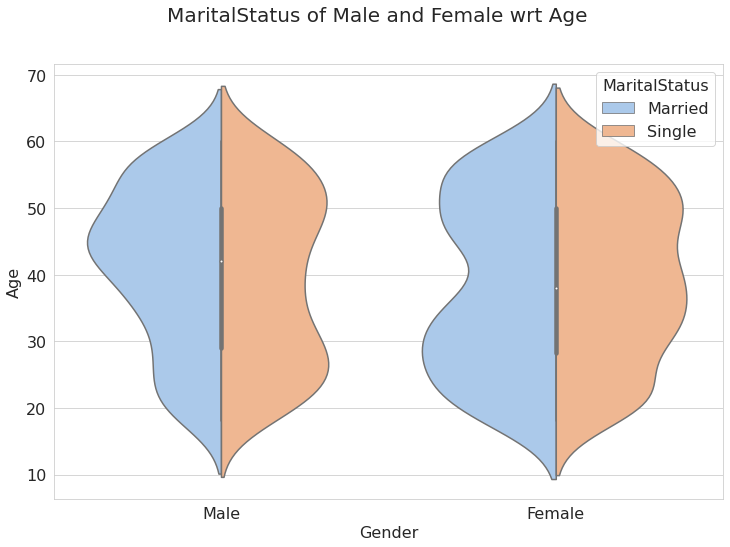

In [21]:
#sns.set_palette("Paired")
plt.figure(figsize=(12, 8))
plt.suptitle("MaritalStatus of Male and Female wrt Age", size=20)
sns.violinplot(x= "Gender",y= "Age", hue="MaritalStatus", data=df,split=True,palette='pastel');

* ***Above Graph is self explanatory , Women are found to marrying more at early age as compared to male , this is might be because of customs , rituals or preconceive notion that female are inferior adjunct to male counterpart.***

* ***This is quite intresting single female are more than single male , this might be the result feminist strand and various government scheme supporting women empowernment***

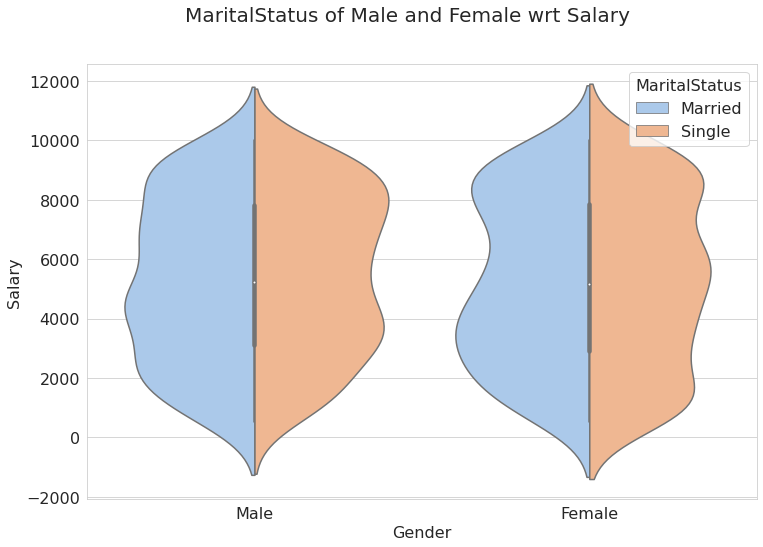

In [22]:
plt.figure(figsize=(12, 8))
plt.suptitle("MaritalStatus of Male and Female wrt Salary ", size=20)
sns.violinplot(x= "Gender",y= "Salary", hue="MaritalStatus", data=df,split=True,palette='pastel');

* ***This is intresting , when marital status is single , there is very less diffrence in salary distribution between male and female***

* ***However , When marital status is married , there exist diffrence in salary distribution between male and female***

In [23]:
grp_by_occupation = df.groupby('Occupation').mean()
grp_by_occupation

,Age,Salary,No.ofChildren
Occupation,,,
Accountant,44.538462,6615.000000,2.769231
Actor,33.812500,4631.375000,2.187500
Aeroplane Pilot,38.750000,6691.166667,2.250000
Agronomist,37.166667,4860.291667,2.583333
Archeologist,43.650000,6117.300000,1.700000
Architect,37.181818,5569.863636,2.409091
Astronomer,32.888889,4632.944444,2.388889
Auditor,34.190476,5252.047619,1.666667
Baker,39.294118,4868.647059,3.058824


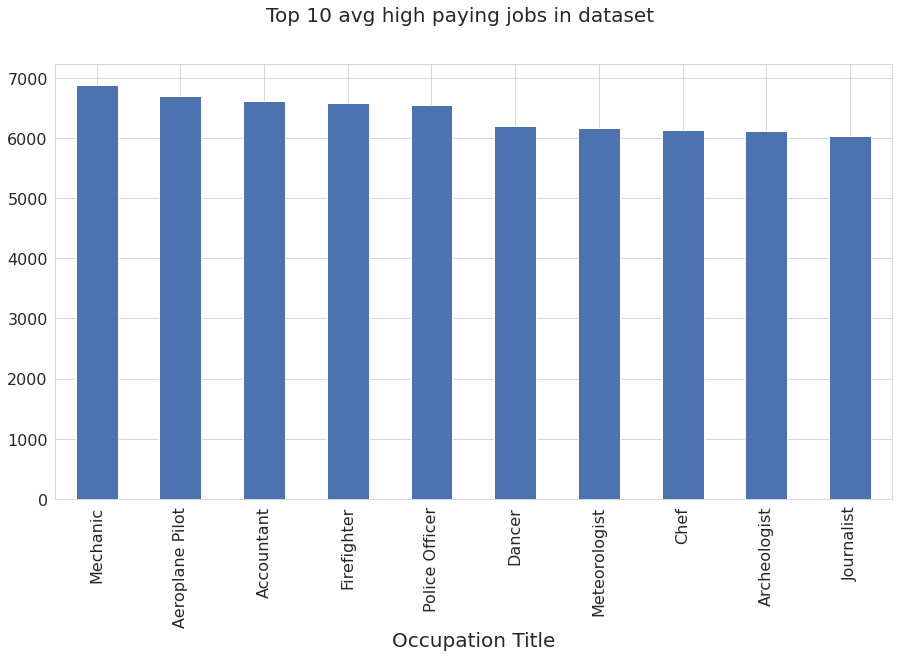

In [24]:
#Top 10 avg high paying jobs
sns.set_palette("deep")
plt.figure(figsize=(15, 8))
plt.suptitle("Top 10 avg high paying jobs in dataset", size=20)
grp_by_occupation.sort_values('Salary',ascending=False).head(10)['Salary'].plot(kind='bar')
plt.xlabel('Occupation Title', size=20);

* ***It is quite simple in inference , wrt avg high paying jobs Mechanic tops the chart followed by Pilot , Accountant and so on***

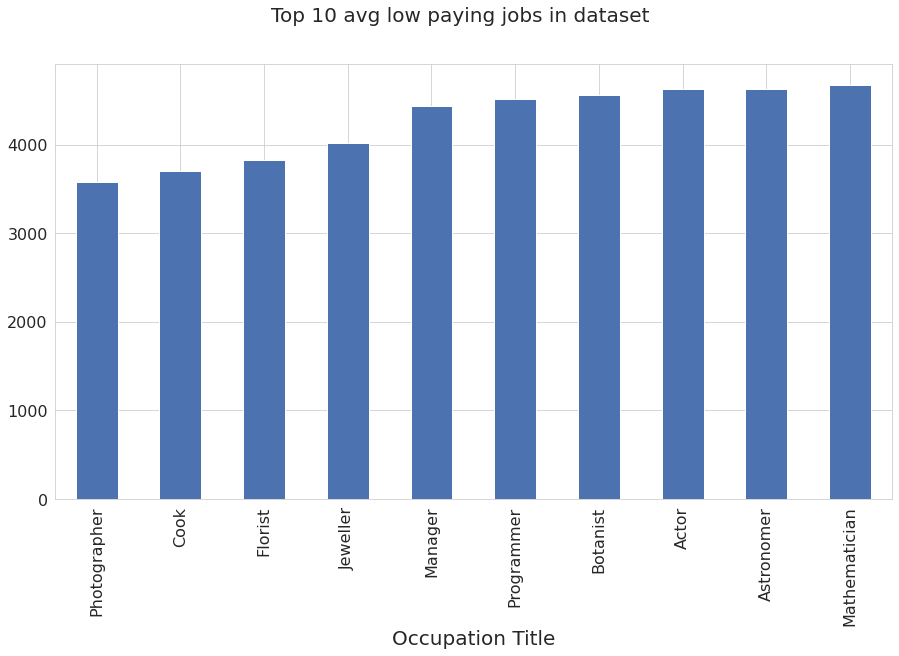

In [25]:
#Top 10 avg low paying jobs
sns.set_palette("deep")
plt.figure(figsize=(15, 8))
plt.suptitle("Top 10 avg low paying jobs in dataset", size=20)
grp_by_occupation.sort_values('Salary',ascending=True)['Salary'].head(10).plot(kind='bar')
plt.xlabel('Occupation Title', size=20);

* ***It is quite simple in inference , wrt avg low paying jobs Photography tops the chart followed by cook , florist and so on***

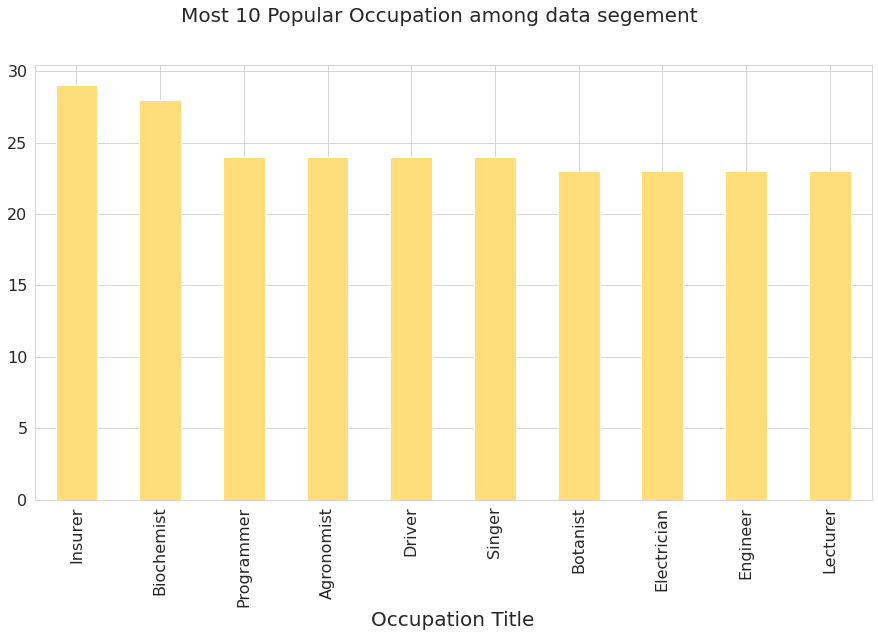

In [27]:
#Most 10 Popular Occupation among data segement
#First Name is use as count variable i.e. no of occurence of given occupation
plt.figure(figsize=(15, 8))
plt.suptitle("Most 10 Popular Occupation among data segement", size=20)
df.groupby('Occupation').count()['FirstName'].sort_values(ascending=False).head(10).plot(kind='bar',color='#ffdd79')
plt.xlabel('Occupation Title', size=20);

* ***It is quite simple in inference , from analysis it is found that Insurer is most popular occupation among segment followed by Biochemist , Programmer , Agronomist and so on***

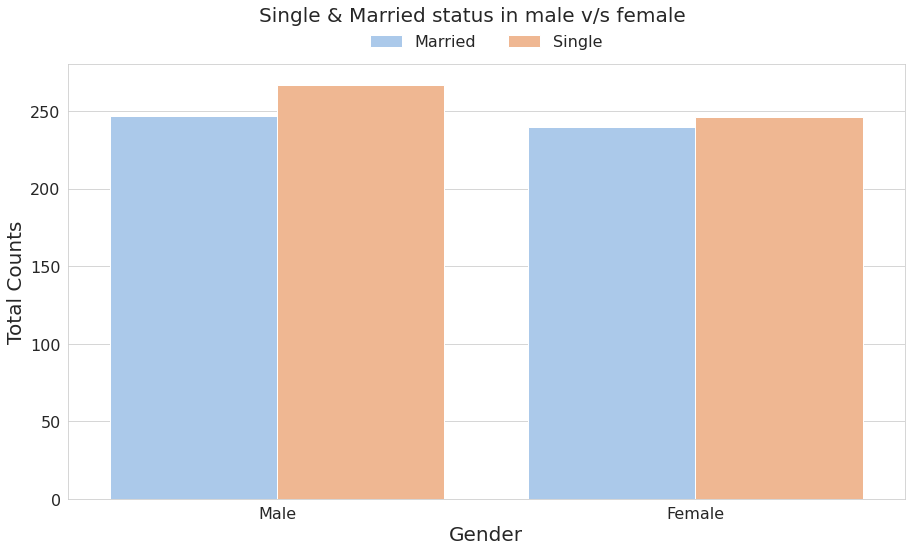

In [28]:
#Married & Single ratio in Male and Female 
plt.figure(figsize=(15, 8))
plt.suptitle("Single & Married status in male v/s female", size=20)
ax = sns.countplot(x='Gender',hue='MaritalStatus',data=df,palette='pastel')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=6, title=None, frameon=False)
plt.ylabel('Total Counts', size=20);
plt.xlabel('Gender', size=20);

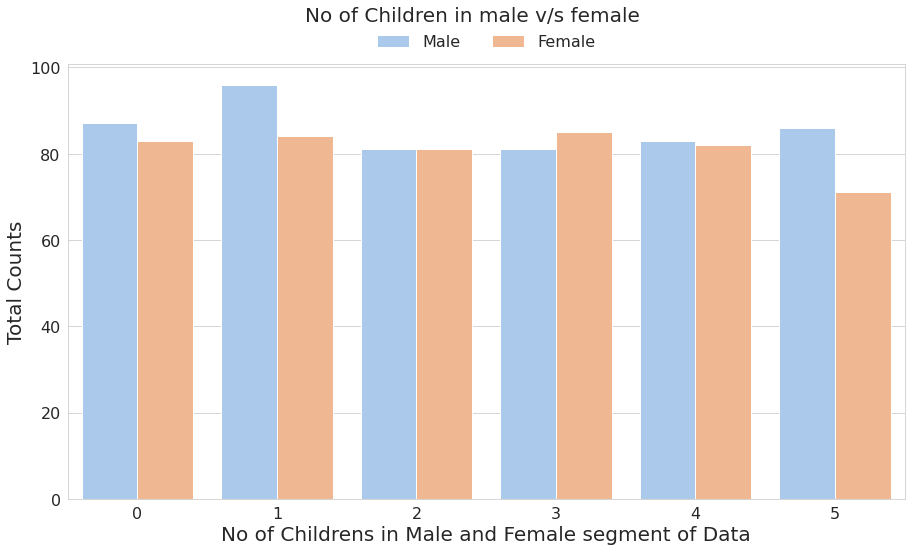

In [29]:
#iskay styling kr k married and unmarried wala bhi chipka 
plt.figure(figsize=(15, 8))
plt.suptitle("No of Children in male v/s female", size=20)
ax = sns.countplot(x='No.ofChildren',hue='Gender',data=df,palette='pastel')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=6, title=None, frameon=False)
plt.ylabel('Total Counts', size=20);
plt.xlabel('No of Childrens in Male and Female segment of Data', size=20);


* ***We can see that there no such huge diffrence in no of children segregated on the basis , male and female data segment***

In [30]:
#Table of Candidate with highest Salary (top10)
top_10_jobs = df.sort_values('Salary',ascending=False).head(10)
top_10_jobs

,FirstName,LastName,Gender,Age,Occupation,Salary,MaritalStatus,No.ofChildren
152,Myra,Grant,Female,47,Graphic Designer,10000,Married,2
969,Reid,Scott,Male,49,Meteorologist,9999,Single,5
204,Alan,Dixon,Male,25,Programmer,9990,Married,3
920,David,Rogers,Male,45,Veterinarian,9990,Married,1
261,Maria,Crawford,Female,18,Physicist,9986,Single,1
404,Kirsten,Perry,Female,30,Meteorologist,9974,Single,3
867,Olivia,Murray,Female,37,Driver,9971,Single,1
743,Julian,Reed,Male,41,Interpreter,9971,Married,4
715,April,Turner,Female,35,Mathematician,9970,Single,2
639,Belinda,Holmes,Female,24,Pharmacist,9925,Single,1


* ***Above table is represents top 10 highest earning indivisuals from our dataset***

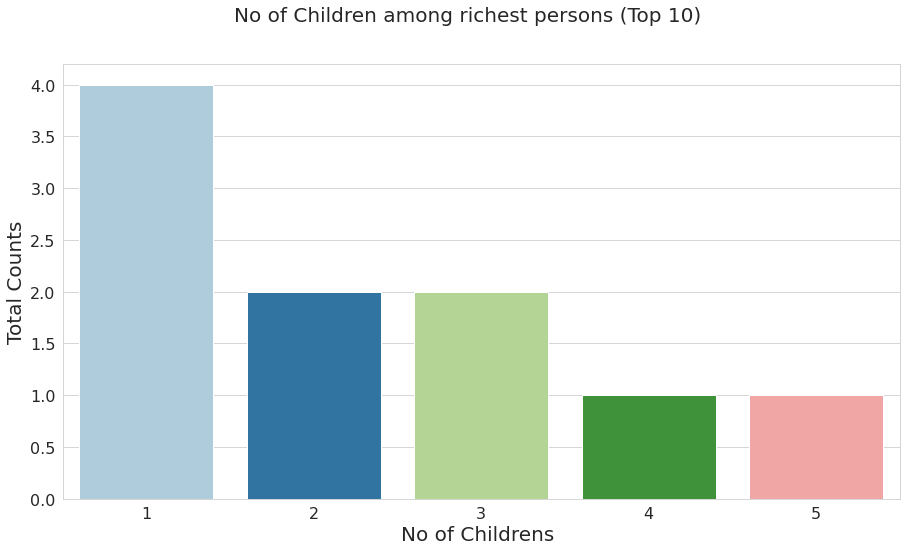

In [31]:
#No of Children among top 10 richest person
sns.set_palette("Paired")
plt.figure(figsize=(15, 8))
plt.suptitle("No of Children among richest persons (Top 10)", size=20)
sns.countplot(x='No.ofChildren',data=top_10_jobs);
plt.ylabel('Total Counts', size=20);
plt.xlabel('No of Childrens ', size=20);


* ***In top richest indivisual , it is found that they prefer less no of children. There is huge gap between 1 and other no , and the as the no of children increase the graphs tends to decrease***

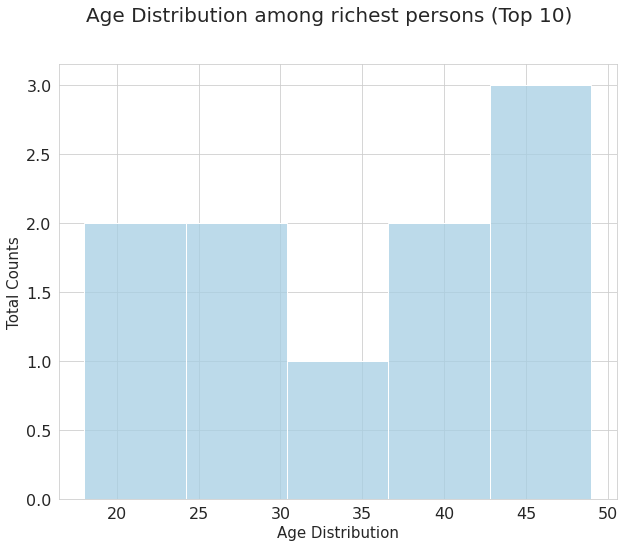

In [32]:
#Age Distribution among top 10 richest jobs 
sns.set_palette("Paired")
plt.figure(figsize=(10, 8))
plt.suptitle("Age Distribution among richest persons (Top 10)", size=20)
sns.histplot(x='Age',data=top_10_jobs)
plt.ylabel('Total Counts', size=15);
plt.xlabel('Age Distribution', size=15);

* ***Most of the indivisual from top 10 richest table are found to above age 35 , hence it is quite evident that , experiance pays off in long term***

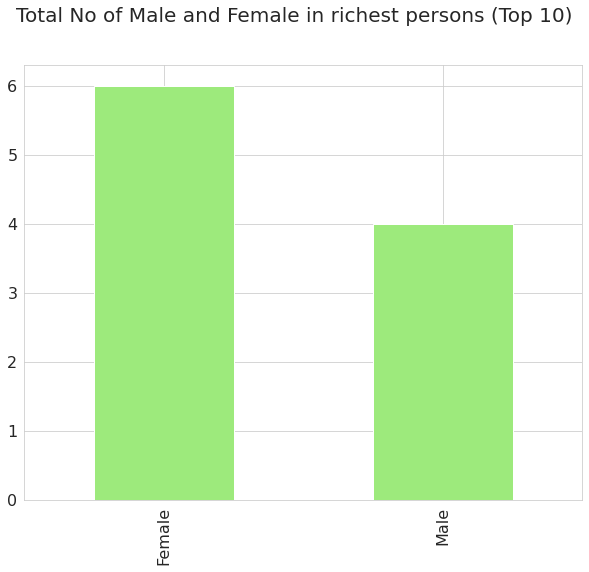

In [35]:
#Male vs Female among top 10 richest jobs 
plt.figure(figsize=(10, 8))
plt.suptitle("Total No of Male and Female in richest persons (Top 10)", size=20)
top_10_jobs.Gender.value_counts().plot(kind='bar',color='#9dea7c');

* ***This is intresting , female counts are more in the list of 10 richest indivisual which is 6 wrt male whose counts are 4***

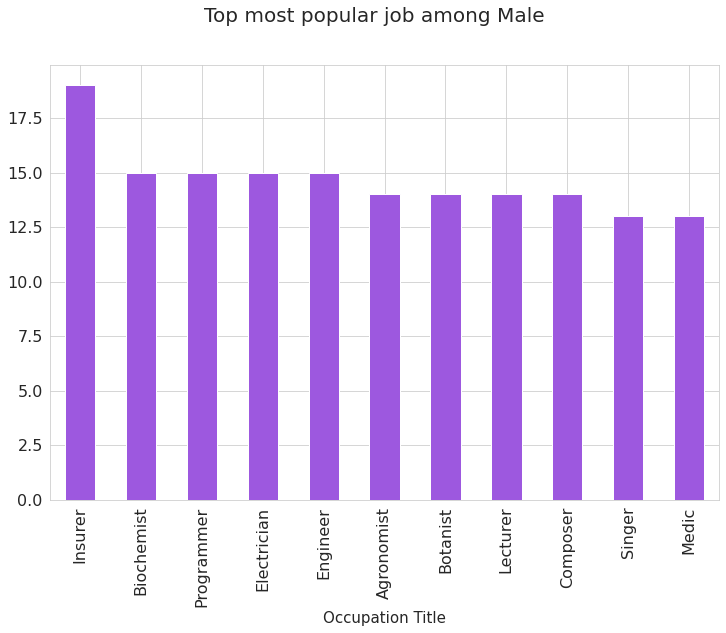

In [38]:
#top most job among male 
plt.figure(figsize=(12, 8))
plt.suptitle("Top most popular job among Male", size=20)
df[df.Gender=='Male'].Occupation.value_counts().iloc[0:11].plot(kind='bar',color='#9d58df')
plt.xlabel('Occupation Title', size=15);

* ***This bar chart , reflect the above chart which replicate the top 10 most popular job titles , since presence of male dominates the dataset that is the reason this chart reflects the inference from above chart***

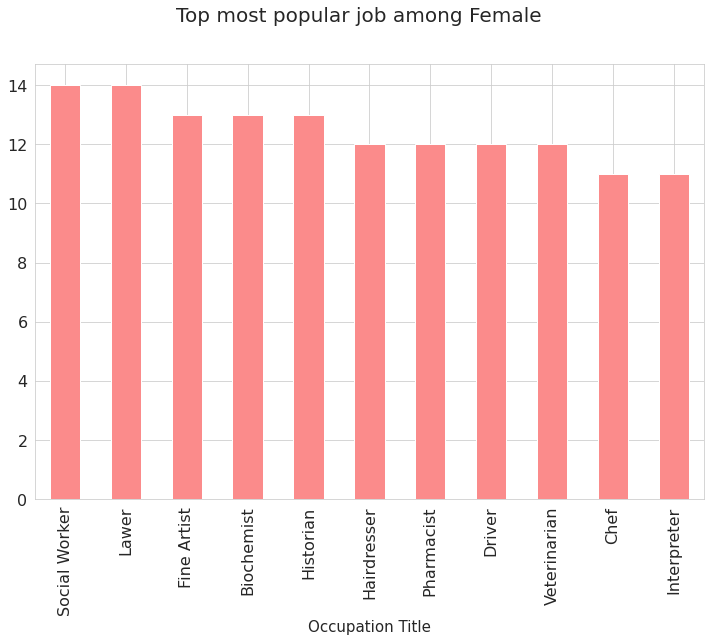

In [39]:
#top most job among female
plt.figure(figsize=(12, 8))
plt.suptitle("Top most popular job among Female", size=20)
df[df.Gender=='Female'].Occupation.value_counts().iloc[0:11].plot(kind='bar',color='#fb8b8b')
plt.xlabel('Occupation Title', size=15);

* ***In female segments Social Worker is most popular job titles followed by Lawer , Fine Artist and so , from job title it is quite eveident that these job profiles demands characteristics which are mostly found in women as compared to men***